In [1]:
## Importing Relevant Libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## for visualization
plt.rcParams['figure.figsize'] = (21,9)
plt.style.use('fivethirtyeight')

In [3]:
## Importing the data 
data = pd.read_csv('med-insurance.csv')
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
## age, bmi , children, expenses : none has any null value
## Also, there are no considerable outliers in age, bmi and children feature.

In [6]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
## sex, smoker, region : none has any NULL value

### Univariate Analysis

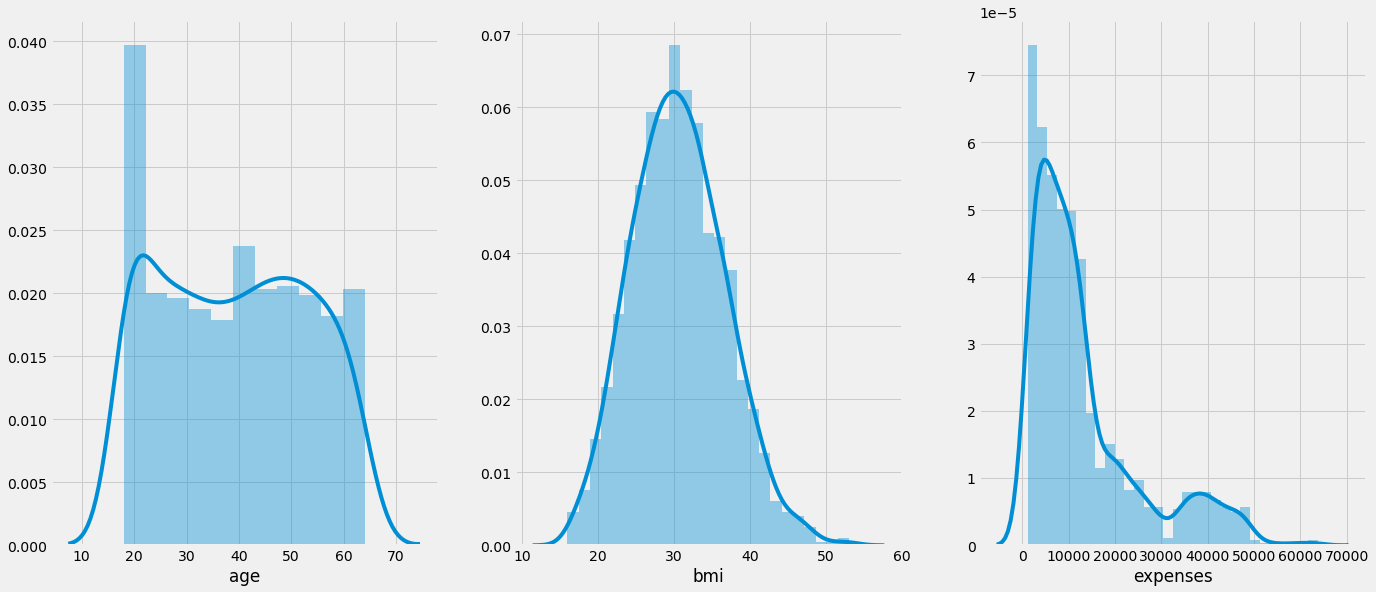

In [8]:
## visualizing the continous features

plt.subplot(1,3,1)
sns.distplot(data['age'])

plt.subplot(1,3,2)
sns.distplot(data['bmi'])

plt.subplot(1,3,3)
sns.distplot(data['expenses'])

In [9]:
## We observe skewness in the target feature 'expenses'. The assumption of normality is important to apply LinearRegression.

In [10]:
data['expenses'] = np.log(data['expenses'])

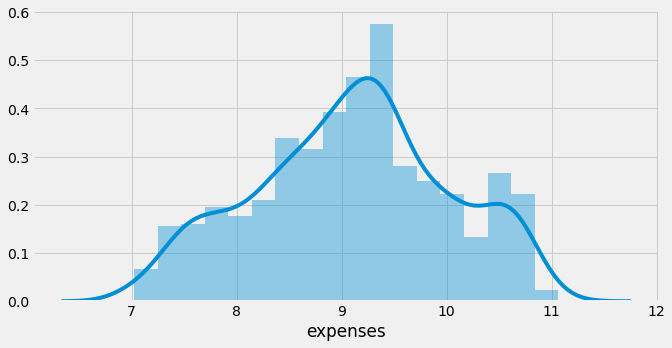

In [11]:
plt.rcParams['figure.figsize'] = (10,5)
sns.distplot(data['expenses'])

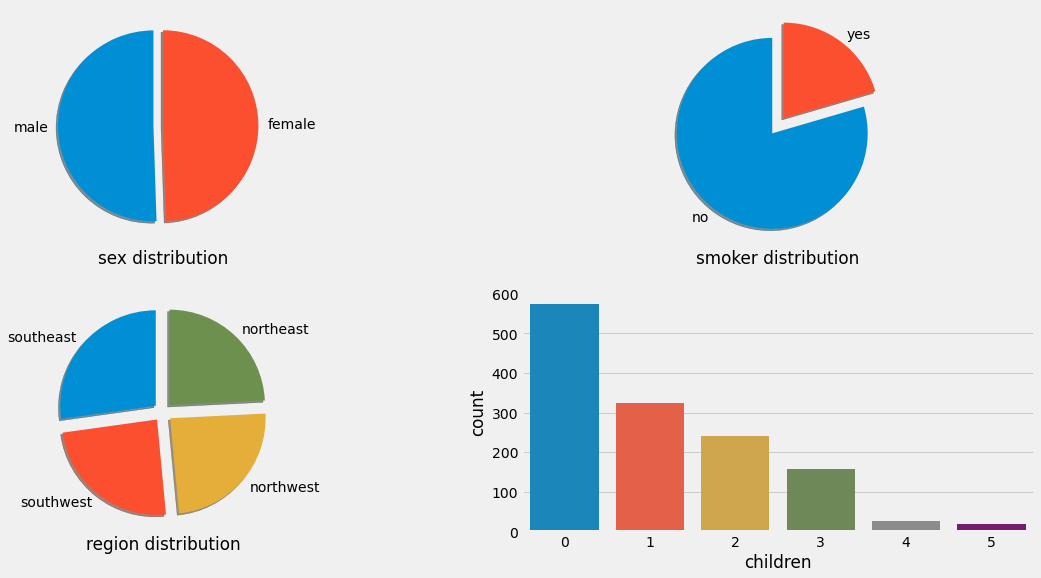

In [12]:
## visualizing the categorical features

plt.rcParams['figure.figsize'] = (18,9)

plt.subplot(2,2,1)
plt.pie(data['sex'].value_counts().values,labels = data['sex'].value_counts().index, 
        shadow = True, explode=[0.1,0], startangle = 90)
plt.xlabel('sex distribution')

plt.subplot(2,2,2)
plt.pie(data['smoker'].value_counts().values, labels = data['smoker'].value_counts().index, 
        shadow = True,explode=[0.1,0.1], startangle = 90)
plt.xlabel('smoker distribution')

plt.subplot(2,2,3)
plt.pie(data['region'].value_counts().values, labels = data['region'].value_counts().index, 
        shadow = True,explode=[0.1,0.1,0.1,0.1], startangle = 90)
plt.xlabel('region distribution')

plt.subplot(2,2,4)
sns.countplot(data['children'])

In [13]:
## there are no constant categorical features. 

### Bi/Multi- Variate Analysis

In [14]:
plt.rcParams['figure.figsize'] = (21,6)

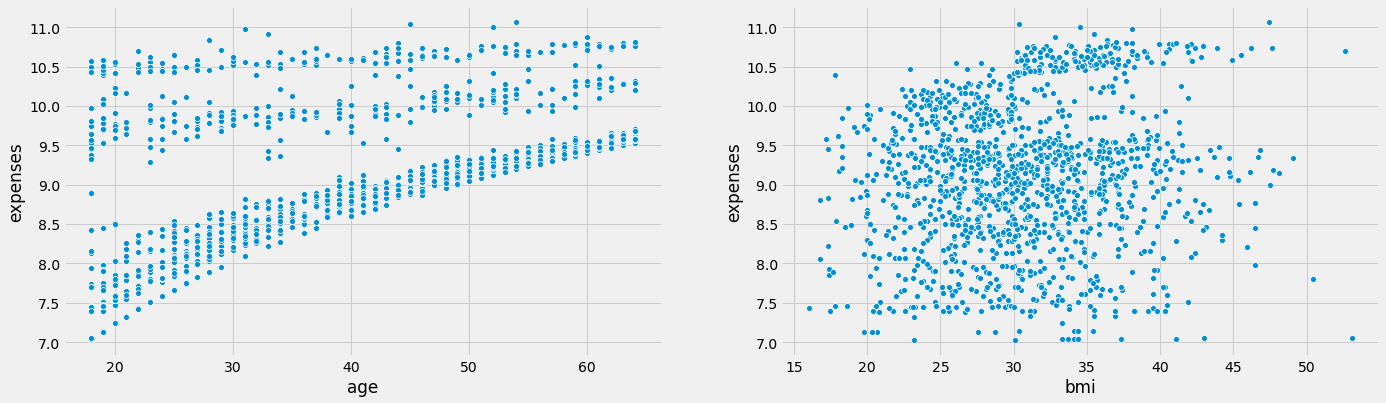

In [15]:
plt.subplot(1,2,1)
sns.scatterplot(data['age'],data['expenses'])

plt.subplot(1,2,2)
sns.scatterplot(data['bmi'],data['expenses'])


In [16]:
## Both Age and BMI share a non-linear relationship with target feature, i.e. expenses.
## Thus, we cannot apply LinearRegression.

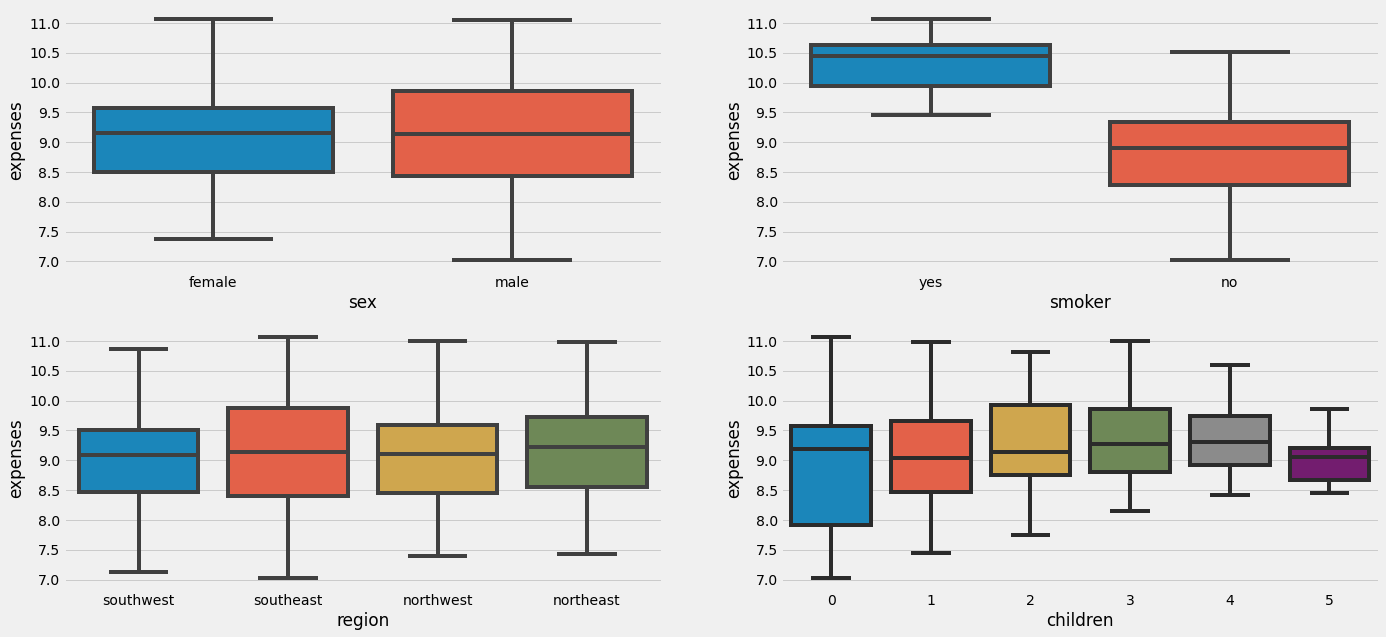

In [17]:
plt.rcParams['figure.figsize'] = (21,10)

plt.subplot(2,2,1)
sns.boxplot(data['sex'],data['expenses'])

plt.subplot(2,2,2)
sns.boxplot(data['smoker'],data['expenses'])

plt.subplot(2,2,3)
sns.boxplot(data['region'],data['expenses'])

plt.subplot(2,2,4)
sns.boxplot(data['children'],data['expenses'])

In [18]:
## sex : being male or female does not make significant difference on medical expense. It is a nominal feature.
## smoker : Smokers have predominantly higher medical expense.
## region : people from southeast region have greater medical expenses. It may be due to costly medical supplies, or unsuitable environment conditions.
## children : people with 0 and 1 child have similar medical expense. With increasing number of children, medical expense increases.

### Encoding the categorical features

In [19]:
data['sex'] = pd.get_dummies(data['sex'], drop_first = True) ## One-Hot Encoding the Nominal feature , i.e sex

In [20]:
data['smoker'] = data['smoker'].replace(('yes','no'),(2,1))
data['region'] = data['region'].replace(('southeast','southwest','northeast','northwest'),(2,1,1,1))

### Revisualizing the data

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,2,1,9.734176
1,18,1,33.8,1,1,2,7.453301
2,28,1,33.0,3,1,2,8.400538
3,33,1,22.7,0,1,1,9.998092
4,32,1,28.9,0,1,1,8.260198


### Finding correlation amongst features

In [22]:
plt.rcParams['figure.figsize'] = (21,6)

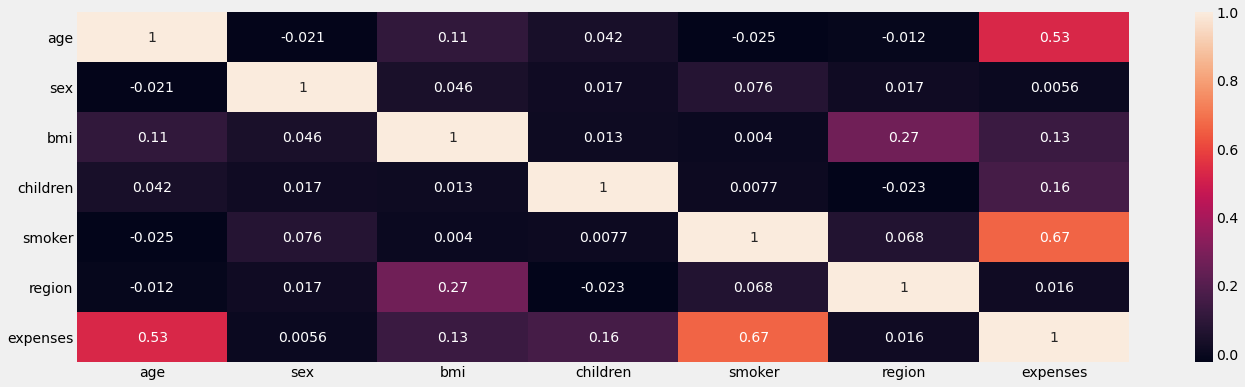

In [23]:
sns.heatmap(data.corr(), annot=True)

In [24]:
## Smokers have high medical expenses. 'smoker' feature is highly correlated with 'expense' feature.
## Other features are independent of each other and moderately correlated with 'expense' feature.
## Hence we can continue without dropping any of the features.

## Splitting the data into test-train

In [25]:
x = data.drop(['expenses'], axis = 1)
y = data['expenses']

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 0 )

### Standardizing the independent features

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_standard = sc.fit_transform(x_train)
x_test_standard = sc.transform(x_test)

### Training the model : K-NN

In [28]:
from sklearn.neighbors import KNeighborsRegressor
reg_knn = KNeighborsRegressor(n_neighbors=5)
reg_knn.fit(x_train_standard, y_train)

KNeighborsRegressor()

In [29]:
knn_pred = reg_knn.predict(x_test_standard)

In [30]:
# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, knn_pred)
print("R2 Score :",r2_score)

RMSE Score : 0.3712365863824637
R2 Score : 0.8358874521821689


In [31]:
## lets perform cross validaion

from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_knn, x_train_standard, y_train, cv=5)
print(scores)

[0.76486572 0.83337902 0.69960058 0.8077557  0.75909428]


### Training the model : Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(random_state = 0)
reg_RF.fit(x_train_standard, y_train)

RandomForestRegressor(random_state=0)

In [33]:
RF_pred = reg_RF.predict(x_test_standard)

In [34]:
# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, RF_pred)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, RF_pred)
print("R2 Score :",r2_score)

RMSE Score : 0.3501617343600759
R2 Score : 0.8539916759012594


In [35]:
## lets perform cross validaion

from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_RF, x_train_standard, y_train, cv=5)
print(scores)

[0.78037185 0.8333832  0.72581587 0.79781531 0.74384437]


### Training the model : XGBoost

In [36]:
from xgboost import XGBRegressor
reg_XGB = XGBRegressor()
reg_XGB.fit(x_train_standard,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
XGB_pred = reg_XGB.predict(x_test_standard)

In [38]:
# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, XGB_pred)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, XGB_pred)
print("R2 Score :",r2_score)

RMSE Score : 0.3687070111032807
R2 Score : 0.8381163310765307


In [39]:
## lets perform cross validaion

from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_XGB, x_train_standard, y_train, cv=5)
print(scores)

[0.67901079 0.73885248 0.7127669  0.79122326 0.697371  ]


### Conclusion

In [40]:
## The R2 score of Random forest model is higher. Also its variance (rmse) is lower than other models.
## Also, Cross validation scores of Random forest Regressor are comparatively higher and stable.
## Thus Random Forest Model works best for PREDICTING HEALTH EXPENSES.